# Sample : Armenia

### Data preparation

In [3]:
# module import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# file import 
data = pd.read_csv("Dataset_wvs2017.csv", low_memory=False)
data.shape

(97220, 613)

### Data Cleaning

In [6]:
list_gen = ["B_COUNTRY","Q235", "Q238", "Q56", "Q148", "Q176"]

In [7]:
# extract variables of interest
list_var = []
for i in list_gen:
        list_var.append(i)
data = data[list_var]    # reduce dimensions
data.shape

(97220, 6)

In [8]:
data.head()

,B_COUNTRY,Q235,Q238,Q56,Q148,Q176
0,20,4,2,1,4,4
1,20,4,2,1,4,-2
2,20,4,2,2,4,5
3,20,3,2,3,4,4
4,20,3,2,-2,4,5


In [9]:
# select data from B_COUNTRY: USA (840).
df = data[data['B_COUNTRY'] == 840]
# delete columns I don't need to use 
df = df.drop(labels =['B_COUNTRY'], axis=1)
df.shape

(2596, 5)

# Data cleaning: Missing values : -1 , -2, -4, -5

## Columns

In [12]:
# Identify columns with missing values or similar, or a combination of: -1 , -2, -4, -5
cercati1, cercati2, cercati3, missing    = [-1], [-2], [-4], [-5]
# Create a mask 
maschera1 , maschera2, maschera3, maschera4 = df.isin(cercati1).any(axis=0), df.isin(cercati2).any(axis=0), df.isin(cercati3).any(axis=0), df.isin(missing).any(axis=0)

# Number of columns with data I am looking for
valori1 = df.columns[maschera1]
valori2 = df.columns[maschera2]
valori3 = df.columns[maschera3]
colmissing = df.columns[missing]
print(
    'N. columns with values:\n -1: ', len(valori1),
     '\n -2: ', len(valori2),
     '\n -4: ', len(valori3),
     '\n -5: ', len(colmissing))

N. columns with values:
 -1:  3 
 -2:  5 
 -4:  0 
 -5:  1


In [13]:
# Are there columns with just one missing value?
valori_cercati = {-1, -2, -4, -5}
# dictionary associating each column to a set of unique values of that particular column but only in those values are among those I am looking for
colonne_relative = {
    colonna: set(df[colonna].unique()) # Get the unique values of a column and create a set 
    for colonna in df.columns# for each column of the dataset
    if set(df[colonna].unique()).issubset(valori_cercati)  # consider only column with values of valori_cercati
}
# identify columns
if colonne_relative:
    for colonna, valori in colonne_relative.items():
        print("Columns with values that are only {-1, -2, -4, -5}:")
        print(f"Colonna: {colonna}, Valori unici: {valori}")
else:
    print("No columns with only values -1, -2, -4, -5.")

No columns with only values -1, -2, -4, -5.


## Check for missing values in rows

In [15]:
# do the same with rows 
# create a mask 
# Create a mask to search for rows with at least one of the searched values
maschera1 , maschera2, maschera3, maschera4 = df.isin(cercati1).any(axis=1), df.isin(cercati2).any(axis=1), df.isin(cercati3).any(axis=1), df.isin(missing).any(axis=1)
# count number of rows with missing or similar
print(
    'N. rows :\n -1: ', maschera1.sum(),
     '\n -2: ', maschera2.sum(),
     '\n -4: ', maschera3.sum(),
     '\n -5: ', maschera4.sum())

N. rows :
 -1:  10 
 -2:  106 
 -4:  0 
 -5:  0


In [16]:
#delete rows with values -1, -2 e -4 e -5 
df = df[~df.isin([-1, -2, -4, -5]).any(axis=1)]
df.shape

(2480, 5)

In [17]:
# looking for implicit constant in the df
colonne_costanti = [colonna for colonna in df.columns if df[colonna].nunique() == 1]
print("Columns:", colonne_costanti)

Columns: []


## Renaming variables

In [19]:
# by using a dictionary
dizionario_vars = {
    'Q235':'Lead_auth',
    'Q238':'Demo_Pol_syst', 
    'Q56':'Threat_ECO', 
    'Q148':'Threat_CIV', 
    'Q176':'Threat_MOR',
 }

# rename the columns in the dataset
df = df.rename(columns= dizionario_vars)

In [20]:
# inverting the values of the scales (see for example "mapping_threat_eco")
mapping_general = {1: 4, 2: 3, 3: 2, 4: 1} 
mapping_threat_mor = {1: 10, 2: 9, 3: 8, 4: 7, 5: 6, 6: 5, 7: 4, 8: 3, 9: 2, 10: 1}
mapping_threat_eco = {1:2,2:3, 3:1} # 1 Worse off , 2: the same, 3 : better off

# Apply the mapping with applymap + lambda function
transform = ['Lead_auth', 'Threat_CIV', 'Demo_Pol_syst']
df[transform] = df[transform].applymap(lambda x: mapping_general[x])

transform2 = ['Threat_ECO']
df[transform2] = df[transform2].applymap(lambda x: mapping_general[x])

df['Threat_MOR'] = df['Threat_MOR'].map(mapping_threat_mor)
print(df)

       Lead_auth  Demo_Pol_syst  Threat_ECO  Threat_CIV  Threat_MOR
89770          1              1           2           2           6
89772          1              3           4           3          10
89773          3              2           2           2           4
89774          1              1           2           1          10
89775          2              4           3           4          10
...          ...            ...         ...         ...         ...
92359          1              4           2           4           4
92360          2              4           4           4           3
92361          2              3           4           3           1
92362          1              4           2           2           3
92364          4              3           3           4          10

[2480 rows x 5 columns]


C:\Users\giamm\AppData\Local\Temp\ipykernel_19012\3002591546.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[transform] = df[transform].applymap(lambda x: mapping_general[x])
C:\Users\giamm\AppData\Local\Temp\ipykernel_19012\3002591546.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[transform2] = df[transform2].applymap(lambda x: mapping_general[x])


In [21]:
# descriptive statistics
df.describe()

,Lead_auth,Demo_Pol_syst,Threat_ECO,Threat_CIV,Threat_MOR
count,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,2.071774,3.295565,3.146371,2.229435,5.386694
std,1.024355,0.804473,0.874973,0.965824,2.797175
min,1.000000,1.000000,2.000000,1.000000,1.000000
25%,1.000000,3.000000,2.000000,1.000000,3.000000
50%,2.000000,3.000000,3.000000,2.000000,6.000000
75%,3.000000,4.000000,4.000000,3.000000,8.000000
max,4.000000,4.000000,4.000000,4.000000,10.000000


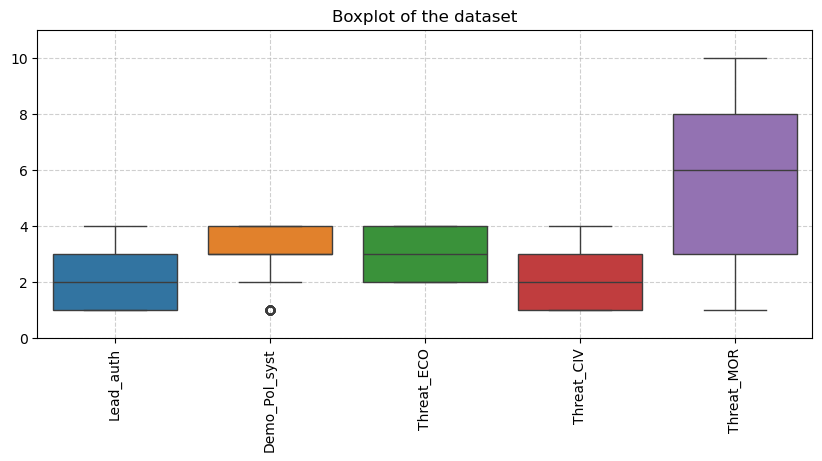

In [22]:
# boxplot to check visualli for the distributions
plt.figure(figsize=(10, 4))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(df.min().min() - 1, df.max().max() + 1)
plt.title("Boxplot of the dataset")
plt.show()

# Contingency tables 

In [24]:
# Four double entry tables with 'Lead_auth' as the focus variable
table_demo_pol_syst = pd.crosstab(df['Demo_Pol_syst'], df['Lead_auth'])
table_threat_eco = pd.crosstab(df['Threat_ECO'], df['Lead_auth'])
table_threat_civ = pd.crosstab(df['Threat_CIV'], df['Lead_auth'])
table_threat_mor = pd.crosstab(df['Threat_MOR'], df['Lead_auth'])

# Print them with labels on the axis
print("Demo_Pol_syst vs Lead_auth:")
print(table_demo_pol_syst)
print("\nThreat_ECO vs Lead_auth:")
print(table_threat_eco)
print("\nThreat_CIV vs Lead_auth:")
print(table_threat_civ)
print("\nThreat_MOR vs Lead_auth:")
print(table_threat_mor)

Demo_Pol_syst vs Lead_auth:
Lead_auth        1    2    3    4
Demo_Pol_syst                    
1               26   21   20   26
2               40  101   89   35
3              235  274  336   93
4              648  277  144  115

Threat_ECO vs Lead_auth:
Lead_auth     1    2    3    4
Threat_ECO                    
2           294  219  196   85
3           215  138  120   56
4           440  316  273  128

Threat_CIV vs Lead_auth:
Lead_auth     1    2    3   4
Threat_CIV                   
1           330  159   88  44
2           366  292  240  87
3           178  154  158  68
4            75   68  103  70

Threat_MOR vs Lead_auth:
Lead_auth     1    2    3   4
Threat_MOR                   
1           186   60   36  31
2           104   48   12   8
3           130   82   50  17
4            76   66   46  20
5            50   54   43  17
6            89  128  153  56
7           105   77   67  24
8           102   82   77  29
9            35   26   44  19
10           72   50   61

### Ordinal Logistic regression

In [26]:
# import the module from statsmodel
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [27]:
# list of the columns i have
df.columns

Index(['Lead_auth', 'Demo_Pol_syst', 'Threat_ECO', 'Threat_CIV', 'Threat_MOR'], dtype='object')

In [28]:
# drop the outcome variable from the dataset 
y = df['Lead_auth']

In [29]:
# change its tape to ordered category
y = y.astype('category').cat.as_ordered()

In [30]:
# check for its unique values
y.unique()

[1, 3, 2, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

# Ordinal regression models with one predictor 

In [32]:
# cycle among all possible models
predittori = df[['Demo_Pol_syst', 'Threat_ECO', 'Threat_CIV', 'Threat_MOR']]
for i in predittori: 
    modello = OrderedModel(y,
                        predittori[[i]],
                        distr='probit')
    risultati = modello.fit(method='bfgs', disp=False)
    print('Results: ', i)
    risultati.summary()
    print(risultati.summary())
    print('-----------')
    print('-----------')

Results:  Demo_Pol_syst
                             OrderedModel Results                             
Dep. Variable:              Lead_auth   Log-Likelihood:                -3143.7
Model:                   OrderedModel   AIC:                             6295.
Method:            Maximum Likelihood   BIC:                             6319.
Date:                Thu, 08 May 2025                                         
Time:                        14:28:48                                         
No. Observations:                2480                                         
Df Residuals:                    2476                                         
Df Model:                           1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Demo_Pol_syst    -0.3689      0.028    -13.377      0.000      -0.423      -0.315
1/2              -1

### Two-predictors models

### Demo_Pol_syst and Threat_ECO

In [35]:
modello = OrderedModel(y,
                        predittori[['Demo_Pol_syst','Threat_ECO']],
                        distr='probit') 
results = modello.fit(method='bfgs', disp=False)
results.summary()
print(results.summary())

                             OrderedModel Results                             
Dep. Variable:              Lead_auth   Log-Likelihood:                -3143.2
Model:                   OrderedModel   AIC:                             6296.
Method:            Maximum Likelihood   BIC:                             6325.
Date:                Thu, 08 May 2025                                         
Time:                        14:28:49                                         
No. Observations:                2480                                         
Df Residuals:                    2475                                         
Df Model:                           2                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Demo_Pol_syst    -0.3716      0.028    -13.415      0.000      -0.426      -0.317
Threat_ECO        0.0262      0.025      1.

In [36]:
# results of interest for further comparison between models
print("AIC:", results.aic)
print("BIC:", results.bic)
print("Log-likelihood of model (llf):", results.llf)
print("Log-likelihood of model without explanatory variables (llnull):", results.llnull)
print("Likelihood ratio chi-squared statistic (llr):", results.llr)
print("Chi-squared probability (llr_pvalue):", results.llr_pvalue)
print("McFadden’s pseudo-R-squared (prsquared):", results.prsquared)

AIC: 6296.366038349108
BIC: 6325.446107544903
Log-likelihood of model (llf): -3143.183019174554
Log-likelihood of model without explanatory variables (llnull): -3233.6563810989865
Likelihood ratio chi-squared statistic (llr): 180.94672384886508
Chi-squared probability (llr_pvalue): 5.104088041119133e-40
McFadden’s pseudo-R-squared (prsquared): 0.02797865674697453


In [37]:
# significant predictors and relatice beta and odds ratio
# Beta and P-values

beta = results.params  # Coefficients (beta)
std_errors = results.bse   # standard errors
p_values = results.pvalues     # P-value
odds= np.exp(results.params)# odds-ratio

# Create a DataFrame with betas and p-values
variabili= pd.DataFrame({'Coef.': beta, 'Std. err.': std_errors, 'P>|z|': p_values, 'Odds' : odds})

# Filter predictor with p-value less than 0.05
betap = variabili[variabili['P>|z|'] < 0.05]
betap = betap[['Coef.', 'Std. err.','Odds']]
# print betas, standard errors and odds ratios
print(betap)

                  Coef.  Std. err.      Odds
Demo_Pol_syst -0.371566   0.027697  0.689653
1/2           -1.452014   0.118771  0.234098
2/3           -0.311896   0.034217  0.732058
3/4           -0.148179   0.036871  0.862277


In [38]:
betaodds = betap['Odds']
print('Odds predittori:\n', betaodds)
print('-------')
num_of_thresholds = 3 # outcome has 4 level therefore we need three thresholds to interpret the data
print('Soglie:\n',  modello.transform_threshold_params(results.params[-num_of_thresholds:]))

Odds predittori:
 Demo_Pol_syst    0.689653
1/2              0.234098
2/3              0.732058
3/4              0.862277
Name: Odds, dtype: float64
-------
Soglie:
 [       -inf -1.45201414 -0.7199565   0.14232008         inf]


### Demo_Pol_syst and Threat_CIV

In [40]:
modello = OrderedModel(y,
                        predittori[['Demo_Pol_syst', 'Threat_CIV']],
                        distr='probit')
results = modello.fit(method='bfgs', disp=False)
results.summary()
print(results.summary())

                             OrderedModel Results                             
Dep. Variable:              Lead_auth   Log-Likelihood:                -3098.5
Model:                   OrderedModel   AIC:                             6207.
Method:            Maximum Likelihood   BIC:                             6236.
Date:                Thu, 08 May 2025                                         
Time:                        14:28:49                                         
No. Observations:                2480                                         
Df Residuals:                    2475                                         
Df Model:                           2                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Demo_Pol_syst    -0.3280      0.028    -11.725      0.000      -0.383      -0.273
Threat_CIV        0.2223      0.023      9.

In [41]:
# Parameters 
print("AIC:", results.aic)
print("BIC:", results.bic)
print("Log-likelihood of model (llf):", results.llf)
print("Log-likelihood of model without explanatory variables (llnull):", results.llnull)
print("Likelihood ratio chi-squared statistic (llr):", results.llr)
print("Chi-squared probability (llr_pvalue):", results.llr_pvalue)
print("McFadden’s pseudo-R-squared (prsquared):", results.prsquared)

AIC: 6207.035269827212
BIC: 6236.1153390230065
Log-likelihood of model (llf): -3098.517634913606
Log-likelihood of model without explanatory variables (llnull): -3233.6563810989865
Likelihood ratio chi-squared statistic (llr): 270.27749237076114
Chi-squared probability (llr_pvalue): 2.0416826601362377e-59
McFadden’s pseudo-R-squared (prsquared): 0.04179131307063999


In [42]:
# as above: betas, p-values, standard errors, odds ratio
beta = results.params  # Coefficients (beta)
std_errors = results.bse   # standard errors
p_values = results.pvalues     # P-value
odds= np.exp(results.params)# odds-ratio

# Create a df 
variabili= pd.DataFrame({'Coef.': beta, 'Std. err.': std_errors, 'P>|z|': p_values, 'Odds' : odds})

# filter significant predictors
betap = variabili[variabili['P>|z|'] < 0.05]
betap = betap[['Coef.', 'Std. err.','Odds']]

print(betap)

                  Coef.  Std. err.      Odds
Demo_Pol_syst -0.328024   0.027977  0.720346
Threat_CIV     0.222271   0.023412  1.248910
1/2           -0.903285   0.115714  0.405236
2/3           -0.289691   0.034189  0.748495
3/4           -0.124018   0.036818  0.883364


In [43]:
betaodds = betap['Odds']
print('Odds predittori:\n', betaodds)
print('-------')
print('Soglie:\n', modello.transform_threshold_params(results.params[-num_of_thresholds:]))

Odds predittori:
 Demo_Pol_syst    0.720346
Threat_CIV       1.248910
1/2              0.405236
2/3              0.748495
3/4              0.883364
Name: Odds, dtype: float64
-------
Soglie:
 [       -inf -0.90328464 -0.15478959  0.728574           inf]


### Demo_Pol_syst and Threat_MOR

In [45]:
modello = OrderedModel(y,
                        predittori[['Demo_Pol_syst','Threat_MOR']],
                        distr='probit')
results = modello.fit(method='bfgs', disp=False)
results.summary()
print(results.summary())

                             OrderedModel Results                             
Dep. Variable:              Lead_auth   Log-Likelihood:                -3102.9
Model:                   OrderedModel   AIC:                             6216.
Method:            Maximum Likelihood   BIC:                             6245.
Date:                Thu, 08 May 2025                                         
Time:                        14:28:49                                         
No. Observations:                2480                                         
Df Residuals:                    2475                                         
Df Model:                           2                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Demo_Pol_syst    -0.3372      0.028    -12.105      0.000      -0.392      -0.283
Threat_MOR        0.0735      0.008      9.

In [46]:
# Parameters
print("AIC:", results.aic)
print("BIC:", results.bic)
print("Log-likelihood of model (llf):", results.llf)
print("Log-likelihood of model without explanatory variables (llnull):", results.llnull)
print("Likelihood ratio chi-squared statistic (llr):", results.llr)
print("Chi-squared probability (llr_pvalue):", results.llr_pvalue)
print("McFadden’s pseudo-R-squared (prsquared):", results.prsquared)

AIC: 6215.706526963433
BIC: 6244.786596159228
Log-likelihood of model (llf): -3102.8532634817166
Log-likelihood of model without explanatory variables (llnull): -3233.6563810989865
Likelihood ratio chi-squared statistic (llr): 261.6062352345398
Chi-squared probability (llr_pvalue): 1.5592932650579315e-57
McFadden’s pseudo-R-squared (prsquared): 0.04045053097843854


In [47]:
# as above: betas, p-values, standard errors, odds ratio

beta = results.params  # Coefficients (beta)
std_errors = results.bse   # standard errors
p_values = results.pvalues     # P-value
odds= np.exp(results.params)# odds-ratio

# Create a df 
variabili= pd.DataFrame({'Coef.': beta, 'Std. err.': std_errors, 'P>|z|': p_values, 'Odds' : odds})

# filter significant predictors
betap = variabili[variabili['P>|z|'] < 0.05]
betap = betap[['Coef.', 'Std. err.','Odds']]

print(betap)

                  Coef.  Std. err.      Odds
Demo_Pol_syst -0.337176   0.027855  0.713783
Threat_MOR     0.073517   0.008150  1.076286
1/2           -1.030317   0.109992  0.356894
2/3           -0.290206   0.034187  0.748110
3/4           -0.130655   0.036799  0.877520


In [48]:
betaodds = betap['Odds']
print('Odds predittori:\n', betaodds)
print('-------')
print('Soglie:\n',  modello.transform_threshold_params(results.params[-num_of_thresholds:]))

Odds predittori:
 Demo_Pol_syst    0.713783
Threat_MOR       1.076286
1/2              0.356894
2/3              0.748110
3/4              0.877520
Name: Odds, dtype: float64
-------
Soglie:
 [       -inf -1.03031661 -0.28220683  0.59531353         inf]


### Ordinal models with interactions

In [50]:
modello = OrderedModel.from_formula(
    'Lead_auth ~ Demo_Pol_syst + Threat_ECO + Demo_Pol_syst * Threat_ECO', df,
                        distr='probit') 
results = modello.fit(method='bfgs', disp=False)
results.summary()
print(results.summary())

                             OrderedModel Results                             
Dep. Variable:              Lead_auth   Log-Likelihood:                -3143.1
Model:                   OrderedModel   AIC:                             6298.
Method:            Maximum Likelihood   BIC:                             6333.
Date:                Thu, 08 May 2025                                         
Time:                        14:28:49                                         
No. Observations:                2480                                         
Df Residuals:                    2474                                         
Df Model:                           3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Demo_Pol_syst               -0.3431      0.102     -3.357      0.001      -0.544      -0.143
Threat_ECO

In [51]:
# parameters
print("AIC:", results.aic)
print("BIC:", results.bic)
print("Log-likelihood of model (llf):", results.llf)
print("Log-likelihood of model without explanatory variables (llnull):", results.llnull)
print("Likelihood ratio chi-squared statistic (llr):", results.llr)
print("Chi-squared probability (llr_pvalue):", results.llr_pvalue)
print("McFadden’s pseudo-R-squared (prsquared):", results.prsquared)

AIC: 6298.2837916917815
BIC: 6333.179874726736
Log-likelihood of model (llf): -3143.1418958458908
Log-likelihood of model without explanatory variables (llnull): -3233.6563810989865
Likelihood ratio chi-squared statistic (llr): 181.0289705061914
Chi-squared probability (llr_pvalue): 5.287520800019483e-39
McFadden’s pseudo-R-squared (prsquared): 0.027991374031625993


In [52]:
beta = results.params  # Coefficients (beta)
std_errors = results.bse   # standard errors
p_values = results.pvalues     # P-value
odds= np.exp(results.params)# odds-ratio

# Create a df 
variabili= pd.DataFrame({'Coef.': beta, 'Std. err.': std_errors, 'P>|z|': p_values, 'Odds' : odds})

# filter the predictors 
betap = variabili[variabili['P>|z|'] < 0.05]
betap = betap[['Coef.', 'Std. err.','Odds']]

print(betap)

                  Coef.  Std. err.      Odds
Demo_Pol_syst -0.343147   0.102229  0.709534
1.0/2.0       -1.360121   0.339437  0.256630
2.0/3.0       -0.311854   0.034217  0.732088
3.0/4.0       -0.148163   0.036871  0.862290


In [53]:
betaodds = betap['Odds']
print('Odds predittori:\n', betaodds)
print('-------')
print('Soglie:\n',   modello.transform_threshold_params(results.params[-num_of_thresholds:]))

Odds predittori:
 Demo_Pol_syst    0.709534
1.0/2.0          0.256630
2.0/3.0          0.732088
3.0/4.0          0.862290
Name: Odds, dtype: float64
-------
Soglie:
 [       -inf -1.36012102 -0.62803261  0.23425766         inf]


In [54]:
modello = OrderedModel.from_formula(
    'Lead_auth ~ Demo_Pol_syst + Threat_CIV+ Demo_Pol_syst * Threat_CIV', df,
                        distr='probit') 
results = modello.fit(method='bfgs', disp=False)
results.summary()
print(results.summary())

                             OrderedModel Results                             
Dep. Variable:              Lead_auth   Log-Likelihood:                -3094.7
Model:                   OrderedModel   AIC:                             6201.
Method:            Maximum Likelihood   BIC:                             6236.
Date:                Thu, 08 May 2025                                         
Time:                        14:28:49                                         
No. Observations:                2480                                         
Df Residuals:                    2474                                         
Df Model:                           3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Demo_Pol_syst               -0.5117      0.072     -7.068      0.000      -0.654      -0.370
Threat_CIV

In [55]:
# Parameters
print("AIC:", results.aic)
print("BIC:", results.bic)
print("Log-likelihood of model (llf):", results.llf)
print("Log-likelihood of model without explanatory variables (llnull):", results.llnull)
print("Likelihood ratio chi-squared statistic (llr):", results.llr)
print("Chi-squared probability (llr_pvalue):", results.llr_pvalue)
print("McFadden’s pseudo-R-squared (prsquared):", results.prsquared)

AIC: 6201.467176999207
BIC: 6236.363260034162
Log-likelihood of model (llf): -3094.7335884996037
Log-likelihood of model without explanatory variables (llnull): -3233.6563810989865
Likelihood ratio chi-squared statistic (llr): 277.84558519876555
Chi-squared probability (llr_pvalue): 6.194329473780878e-60
McFadden’s pseudo-R-squared (prsquared): 0.04296151978651752


In [56]:
beta = results.params  # Coefficienti (beta)
std_errors = results.bse   # standard errors
p_values = results.pvalues     # P-value
odds= np.exp(results.params)# odds-ratio

# Create a df 
variabili= pd.DataFrame({'Coef.': beta, 'Std. err.': std_errors, 'P>|z|': p_values, 'Odds' : odds})

# Filter the predictors 
betap = variabili[variabili['P>|z|'] < 0.05]
betap = betap[['Coef.', 'Std. err.','Odds']]

print(betap)

                             Coef.  Std. err.      Odds
Demo_Pol_syst            -0.511667   0.072393  0.599495
Demo_Pol_syst:Threat_CIV  0.077868   0.028290  1.080980
1.0/2.0                  -1.514521   0.250406  0.219913
2.0/3.0                  -0.287614   0.034188  0.750051
3.0/4.0                  -0.124213   0.036811  0.883192


In [57]:
betaodds = betap['Odds']
print('Odds predittori:\n', betaodds)
print('-------')
print('Soglie:\n',   modello.transform_threshold_params(results.params[-num_of_thresholds:]))

Odds predittori:
 Demo_Pol_syst               0.599495
Demo_Pol_syst:Threat_CIV    1.080980
1.0/2.0                     0.219913
2.0/3.0                     0.750051
3.0/4.0                     0.883192
Name: Odds, dtype: float64
-------
Soglie:
 [       -inf -1.51452115 -0.76446985  0.11872184         inf]


In [58]:
modello = OrderedModel.from_formula(
    'Lead_auth ~ Demo_Pol_syst + Threat_MOR + Demo_Pol_syst * Threat_MOR', df,
                        distr='probit') 
results = modello.fit(method='bfgs', disp=False)
results.summary()
print(results.summary())

                             OrderedModel Results                             
Dep. Variable:              Lead_auth   Log-Likelihood:                -3095.6
Model:                   OrderedModel   AIC:                             6203.
Method:            Maximum Likelihood   BIC:                             6238.
Date:                Thu, 08 May 2025                                         
Time:                        14:28:49                                         
No. Observations:                2480                                         
Df Residuals:                    2474                                         
Df Model:                           3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Demo_Pol_syst               -0.5556      0.064     -8.701      0.000      -0.681      -0.430
Threat_MOR

In [59]:
# parameters
print("AIC:", results.aic)
print("BIC:", results.bic)
print("Log-likelihood of model (llf):", results.llf)
print("Log-likelihood of model without explanatory variables (llnull):", results.llnull)
print("Likelihood ratio chi-squared statistic (llr):", results.llr)
print("Chi-squared probability (llr_pvalue):", results.llr_pvalue)
print("McFadden’s pseudo-R-squared (prsquared):", results.prsquared)

AIC: 6203.2178955984855
BIC: 6238.11397863344
Log-likelihood of model (llf): -3095.6089477992427
Log-likelihood of model without explanatory variables (llnull): -3233.6563810989865
Likelihood ratio chi-squared statistic (llr): 276.09486659948743
Chi-squared probability (llr_pvalue): 1.4818192645721605e-59
McFadden’s pseudo-R-squared (prsquared): 0.042690817152571725


In [60]:
beta = results.params  # Coefficients (beta)
std_errors = results.bse   # standard errors
p_values = results.pvalues     # P-value
odds= np.exp(results.params)# odds-ratio

# Create a df
variabili= pd.DataFrame({'Coef.': beta, 'Std. err.': std_errors, 'P>|z|': p_values, 'Odds' : odds})

# Filter the predictors
betap = variabili[variabili['P>|z|'] < 0.05]
betap = betap[['Coef.', 'Std. err.','Odds']]

print(betap)

                             Coef.  Std. err.      Odds
Demo_Pol_syst            -0.555565   0.063851  0.573748
Demo_Pol_syst:Threat_MOR  0.037630   0.009888  1.038347
1.0/2.0                  -1.763492   0.221815  0.171445
2.0/3.0                  -0.286893   0.034183  0.750592
3.0/4.0                  -0.130645   0.036788  0.877529


In [61]:
betaodds = betap['Odds']
print('Odds predittori:\n', betaodds)
print('-------')
print('Soglie:\n',   modello.transform_threshold_params(results.params[-num_of_thresholds:]))

Odds predittori:
 Demo_Pol_syst               0.573748
Demo_Pol_syst:Threat_MOR    1.038347
1.0/2.0                     0.171445
2.0/3.0                     0.750592
3.0/4.0                     0.877529
Name: Odds, dtype: float64
-------
Soglie:
 [       -inf -1.76349218 -1.0129004  -0.13537151         inf]
